In [5]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import os
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
os.environ["OMP_NUM_THREADS"] = "1"
figsize = (12, 6)

# Python Data Science Final Mini Project<br>
## Project Title: **Telco Customer Churn Analysis**<br>

### Course: **Python Data Science - 094202**<br>

# Part One  - Choose a dataset

## a. State which dataset you chose<br>
Telco Customer Churn

## b. Provide a brief (2-4 sentences) description of the dataset. What is this dataset about?<br>
The Telco Customer Churn dataset tracks customer demographics, services, and account status, indicating whether they stayed or left. It includes metrics like Churn Score and Customer Lifetime Value (CLTV) to help analyze factors influencing customer churn.

## c. List the features in the dataset and their types<br>
This is the metadata to the dataset.
The data is a single CSV file with 50 features.

| No. | Field                              | DataType |
|-----|-------------------------------------|----------|
| 1   | Customer ID                        | String   |
| 2   | Gender                             | String   |
| 3   | Age                                | Integer  |
| 4   | Under 30                           | Boolean  |
| 5   | Senior Citizen                     | Boolean  |
| 6   | Married                            | Boolean  |
| 7   | Dependents                         | Boolean  |
| 8   | Number of Dependents               | Integer  |
| 9   | Country                            | String   |
| 10  | State                              | String   |
| 11  | City                               | String   |
| 12  | Zip Code                           | String   |
| 13  | Latitude                           | Float    |
| 14  | Longitude                          | Float    |
| 15  | Population                         | Integer  |
| 16  | Quarter                            | String   |
| 17  | Referred a Friend                  | Boolean  |
| 18  | Number of Referrals                | Integer  |
| 19  | Tenure in Months                   | Integer  |
| 20  | Offer                              | String   |
| 21  | Phone Service                      | Boolean  |
| 22  | Avg Monthly Long Distance Charges  | Float    |
| 23  | Multiple Lines                     | Boolean  |
| 24  | Internet Service                   | Boolean  |
| 25  | Internet Type                      | String   |
| 26  | Avg Monthly GB Download            | Float    |
| 27  | Online Security                    | Boolean  |
| 28  | Online Backup                      | Boolean  |
| 29  | Device Protection Plan             | Boolean  |
| 30  | Premium Tech Support               | Boolean  |
| 31  | Streaming TV                       | Boolean  |
| 32  | Streaming Movies                   | Boolean  |
| 33  | Streaming Music                    | Boolean  |
| 34  | Unlimited Data                     | Boolean  |
| 35  | Contract                           | String   |
| 36  | Paperless Billing                  | Boolean  |
| 37  | Payment Method                     | String   |
| 38  | Monthly Charge                     | Float    |
| 39  | Total Charges                      | Float    |
| 40  | Total Refunds                      | Float    |
| 41  | Total Extra Data Charges           | Float    |
| 42  | Total Long Distance Charges        | Float    |
| 43  | Total Revenue                      | Float    |
| 44  | Satisfaction Score                 | Integer  |
| 45  | Customer Status                    | String   |
| 46  | Churn Label                        | Boolean  |
| 47  | Churn Score                        | Integer  |
| 48  | CLTV                               | Float    |
| 49  | Churn Category                     | String   |
| 50  | Churn Reason                       | String   |


## d. List the number of records in the dataset


In [12]:
telco_data = pd.read_csv('telco.csv')
print(f"The dataset contains {telco_data.shape[0]} records and {telco_data.shape[1]} features.")

The dataset contains 7043 records and 50 features.


# Part two  - Exploratory data analysis

In [14]:
telco_data.head()

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,...,20,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,...,0,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,...,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,United States,California,...,0,494.00,2995.07,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,United States,California,...,0,234.21,3102.36,2,Churned,Yes,67,2793,Price,Extra data charges


In [15]:
#Here you can see the types of properties of the dataset, the number of records, whether it contains null values and property names.
telco_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Under 30                           7043 non-null   object 
 4   Senior Citizen                     7043 non-null   object 
 5   Married                            7043 non-null   object 
 6   Dependents                         7043 non-null   object 
 7   Number of Dependents               7043 non-null   int64  
 8   Country                            7043 non-null   object 
 9   State                              7043 non-null   object 
 10  City                               7043 non-null   object 
 11  Zip Code                           7043 non-null   int64

In [16]:
#In order to reach statistical information, we can easily reach values such as average, standard deviation, min and max with the "describe" function.
telco_data.describe(include='all')

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
count,7043,7043,7043.000000,7043,7043,7043,7043,7043.000000,7043,7043,...,7043.000000,7043.000000,7043.000000,7043.000000,7043,7043,7043.000000,7043.000000,1869,1869
unique,7043,2,NaN,2,2,2,2,NaN,1,1,...,NaN,NaN,NaN,NaN,3,2,NaN,NaN,5,20
top,8779-QRDMV,Male,NaN,No,No,No,No,NaN,United States,California,...,NaN,NaN,NaN,NaN,Stayed,No,NaN,NaN,Competitor,Competitor had better devices
freq,1,3555,NaN,5642,5901,3641,5416,NaN,7043,7043,...,NaN,NaN,NaN,NaN,4720,5174,NaN,NaN,841,313
mean,NaN,NaN,46.509726,NaN,NaN,NaN,NaN,0.468692,NaN,NaN,...,6.860713,749.099262,3034.379056,3.244924,NaN,NaN,58.505040,4400.295755,NaN,NaN
std,NaN,NaN,16.750352,NaN,NaN,NaN,NaN,0.962802,NaN,NaN,...,25.104978,846.660055,2865.204542,1.201657,NaN,NaN,21.170031,1183.057152,NaN,NaN
min,NaN,NaN,19.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,...,0.000000,0.000000,21.360000,1.000000,NaN,NaN,5.000000,2003.000000,NaN,NaN
25%,NaN,NaN,32.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,...,0.000000,70.545000,605.610000,3.000000,NaN,NaN,40.000000,3469.000000,NaN,NaN
50%,NaN,NaN,46.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,...,0.000000,401.440000,2108.640000,3.000000,NaN,NaN,61.000000,4527.000000,NaN,NaN
75%,NaN,NaN,60.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,...,0.000000,1191.100000,4801.145000,4.000000,NaN,NaN,75.500000,5380.500000,NaN,NaN


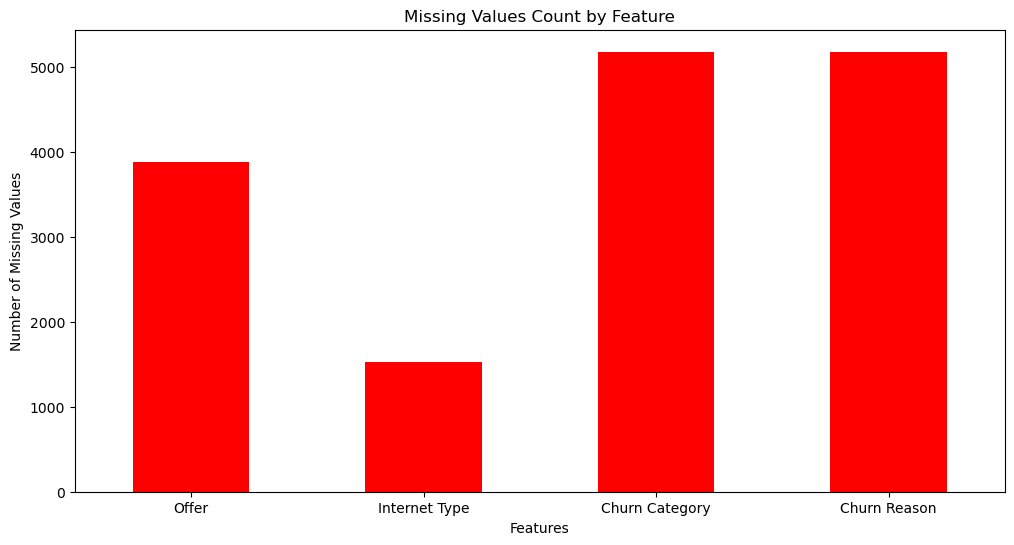

In [17]:
#Visualizing the missing values
# Calculate missing values for each feature
missing_values = telco_data.isnull().sum()

# Filter out columns with no missing data
missing_values = missing_values[missing_values > 0]

# Plot the missing values
missing_values.plot(kind='bar', figsize=figsize, color='red')
plt.title('Missing Values Count by Feature')
plt.xlabel('Features')
plt.xticks(rotation=0)
plt.ylabel('Number of Missing Values')
plt.show()

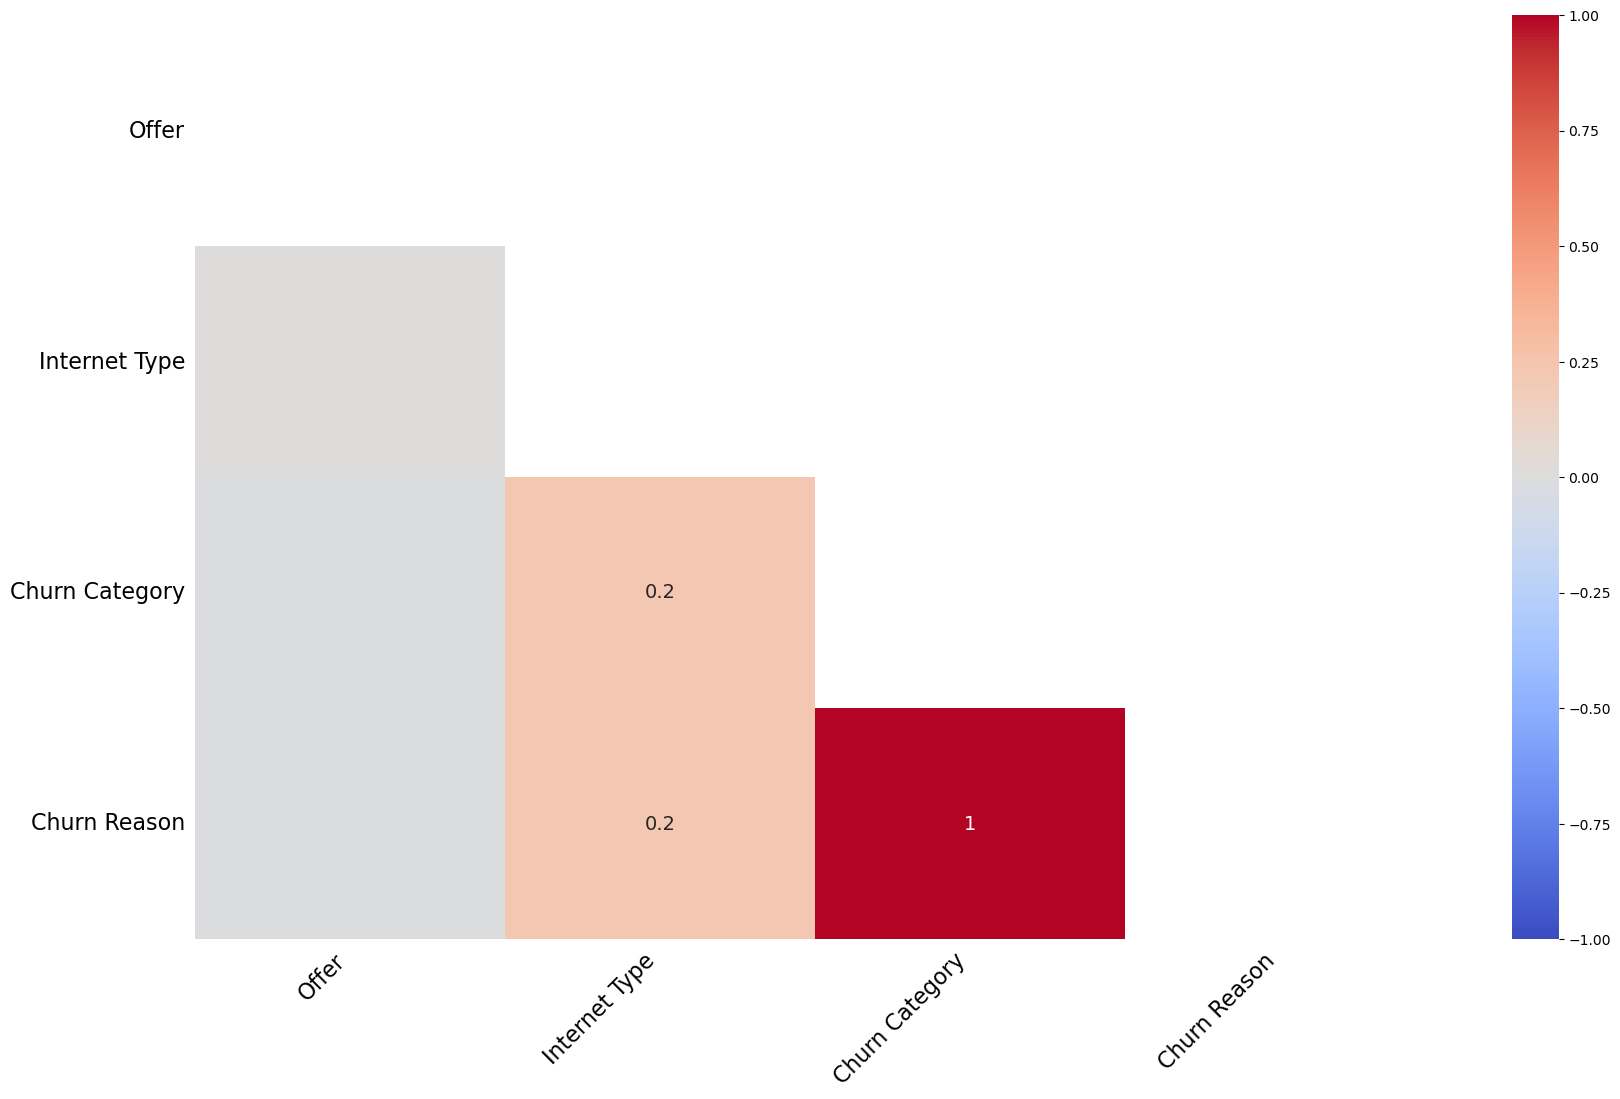

In [18]:
# Visualize missing data correlation matrix
mn.heatmap(telco_data, cmap='coolwarm');

This heatmap represents the percentage of missing data for the selected variables in the dataset.
- *Offer (gray color)*: This variable has no missing values, indicated by the light gray color.
- *Internet Type*: There are around 20% missing values in this column, shown by the light orange color.
- *Churn Category*: Similarly, this column has about 20% missing data, also in light orange.
- *Churn Reason (dark red)*: This column has all its data missing (100% missing), represented by the dark red color.
The heatmap is important because it helps visually identify where the missing data exists, which is crucial in determining how to handle it during the analysis. For example, missing data in *Churn Reason* might need further attention to avoid bias in the results.<br>
- The darker the color (towards red), it indicates a higher percentage of missing data.

In [21]:
#PERCENTAGE OF THE MISSING VALUES - DATAFRAME 
def missing_data(telco_data):
    total = telco_data.isnull().sum().sort_values(ascending = False)
    Percentage = (telco_data.isnull().sum()/telco_data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, Percentage], axis=1, keys=['Total', 'Percentage'])
missing_data(telco_data).head(4).style.background_gradient(cmap='Greys')

,Total,Percentage
Churn Reason,5174,73.463013
Churn Category,5174,73.463013
Offer,3877,55.047565
Internet Type,1526,21.666903


In [22]:
telco_data[telco_data.duplicated()].shape

(0, 50)

We can see that there are no duplicated rows in the dataset.

## a. Show plots illustrating the distribution of at least 5 variables in your dataset. Comment on anything interesting you observe.

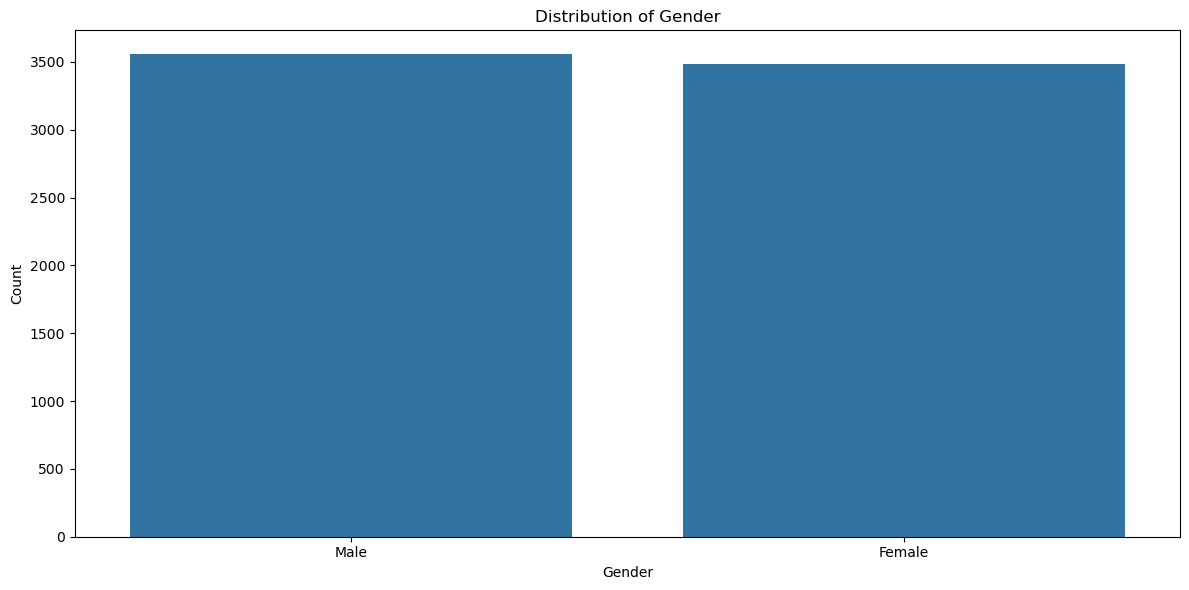

Gender
Male      3555
Female    3488
Name: count, dtype: int64

In [25]:
# Let's check the distribution of the Gender.
plt.figure(figsize=figsize)
sns.countplot(data=telco_data,x="Gender")
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0) 
plt.tight_layout() 
plt.show()
telco_data["Gender"].value_counts()

The gender distribution is nearly balanced, with slightly more male customers (3555) than female customers (3488), showing an almost equal customer base across genders.

In [27]:
telco_data["Churn Reason"].value_counts()

Churn Reason
Competitor had better devices                313
Competitor made better offer                 311
Attitude of support person                   220
Don't know                                   130
Competitor offered more data                 117
Competitor offered higher download speeds    100
Attitude of service provider                  94
Price too high                                78
Product dissatisfaction                       77
Network reliability                           72
Long distance charges                         64
Service dissatisfaction                       63
Moved                                         46
Extra data charges                            39
Limited range of services                     37
Poor expertise of online support              31
Lack of affordable download/upload speed      30
Lack of self-service on Website               29
Poor expertise of phone support               12
Deceased                                       6
Name: c

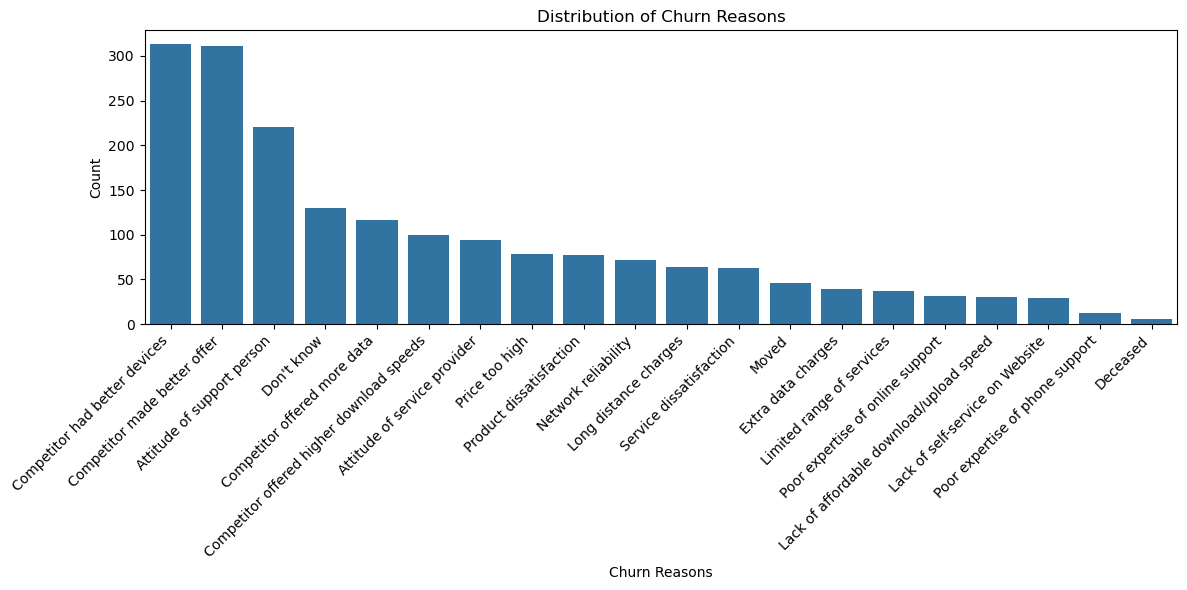

In [28]:
#Lets check the distribution of the Churn Reason
plt.figure(figsize=figsize)
sns.countplot(data=telco_data,x="Churn Reason",order=telco_data['Churn Reason'].value_counts().index)
plt.title('Distribution of Churn Reasons')
plt.xlabel('Churn Reasons')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  
plt.show()

The plot shows that the main reasons for churn are **"Competitor had better devices"** and **"Competitor made better offer"**, indicating strong competition. **Customer support issues** also contribute significantly to churn, while reasons like **"Deceased"** or **"Lack of self-service"** are less common. This suggests focusing on competitiveness and service improvements to reduce churn.


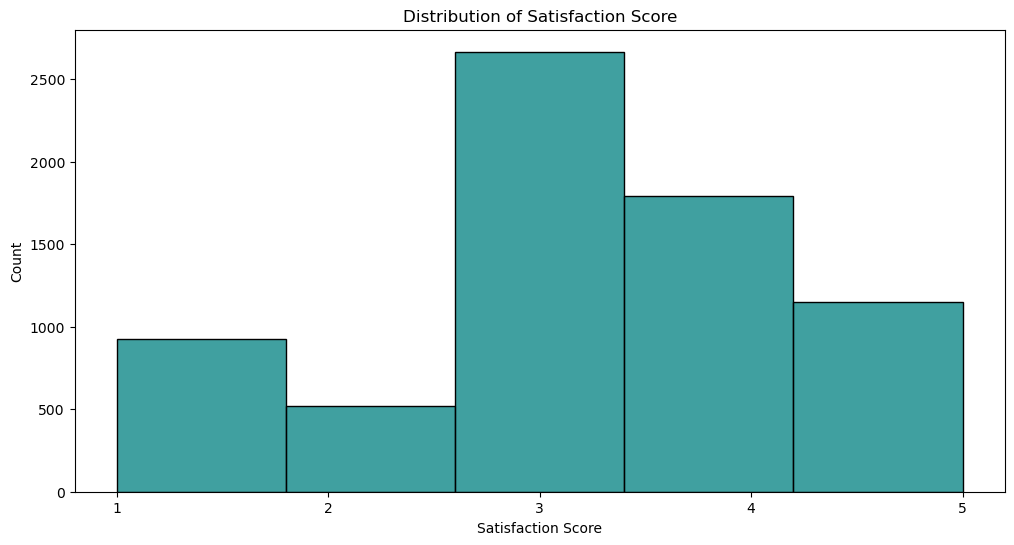

Satisfaction Score
3    2665
4    1789
5    1149
1     922
2     518
Name: count, dtype: int64

In [30]:
#Lets check the distribution of the Satisfaction Score.
plt.figure(figsize=figsize)
sns.histplot(telco_data['Satisfaction Score'], kde=False, bins=5, color='teal')
plt.title('Distribution of Satisfaction Score')
plt.xlabel('Satisfaction Score')
plt.xticks([1,2,3,4,5])
plt.ylabel('Count')
plt.show()
telco_data["Satisfaction Score"].value_counts()

The **Satisfaction Score** distribution shows two peaks around 3 and 4, indicating that most customers are moderately satisfied, with fewer reporting extreme satisfaction or dissatisfaction.

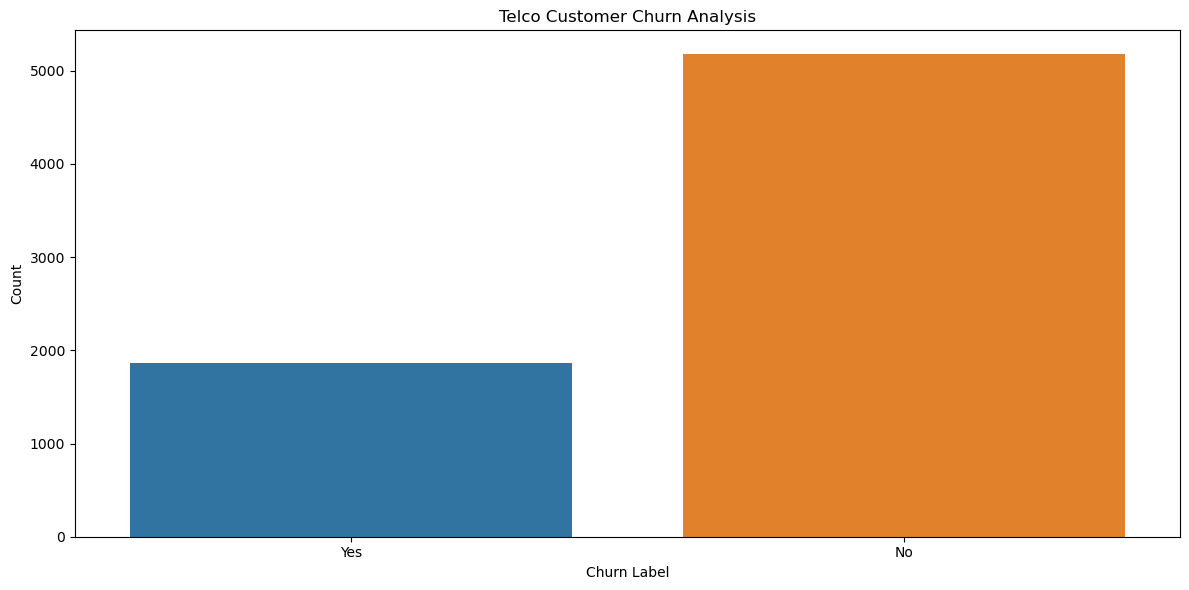

Churn Label
No     5174
Yes    1869
Name: count, dtype: int64

In [32]:
# Calculate the percentage of churn
churn_counts = telco_data['Churn Label'].value_counts()
churn_percentages = churn_counts / len(telco_data) * 100

# Create a bar plot for churn label distribution with counts and percentages
plt.figure(figsize=figsize)
sns.countplot(data=telco_data, x='Churn Label',hue='Churn Label')
plt.title('Telco Customer Churn Analysis')
plt.xlabel('Churn Label')
plt.ylabel('Count')
plt.tight_layout()
plt.show()
telco_data["Churn Label"].value_counts()

The chart shows that 73.46% of customers stayed, while 26.54% churned. This highlights a notable churn rate

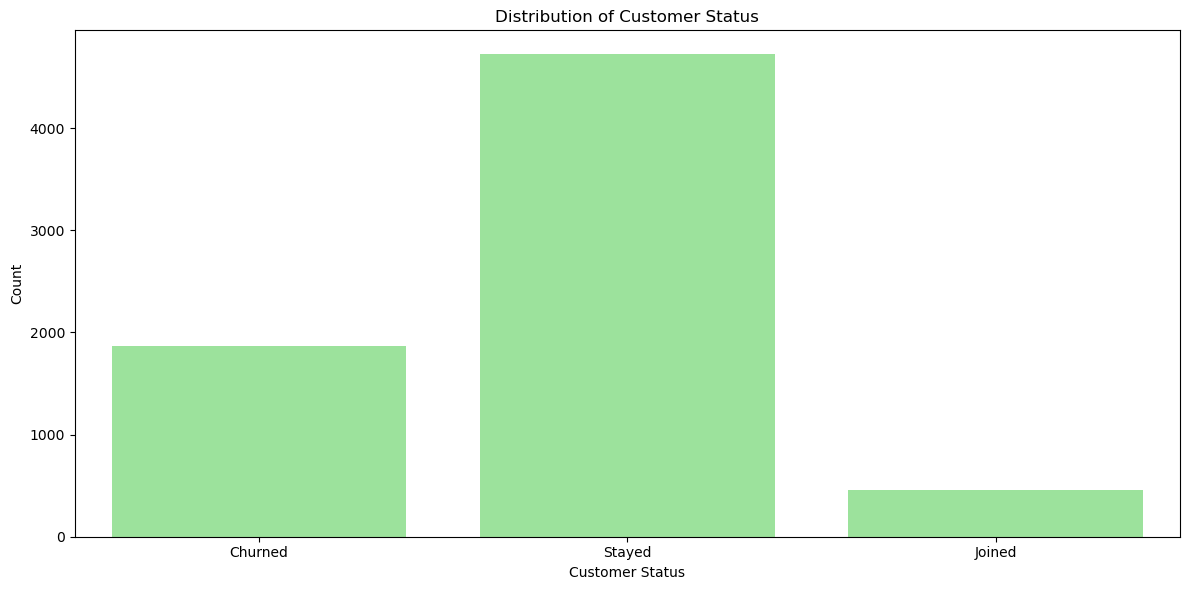

Customer Status
Stayed     4720
Churned    1869
Joined      454
Name: count, dtype: int64

In [34]:
#Lets check the distribution of the Customer Status.
plt.figure(figsize=figsize)
sns.countplot(data=telco_data,x="Customer Status", color='lightgreen')
plt.title('Distribution of Customer Status')
plt.xlabel('Customer Status')
plt.ylabel('Count')
plt.xticks(rotation=0)  
plt.tight_layout()
plt.show()
telco_data["Customer Status"].value_counts()

Most customers have Stayed, while a significant portion has Churned, and only a small number have Joined recently.


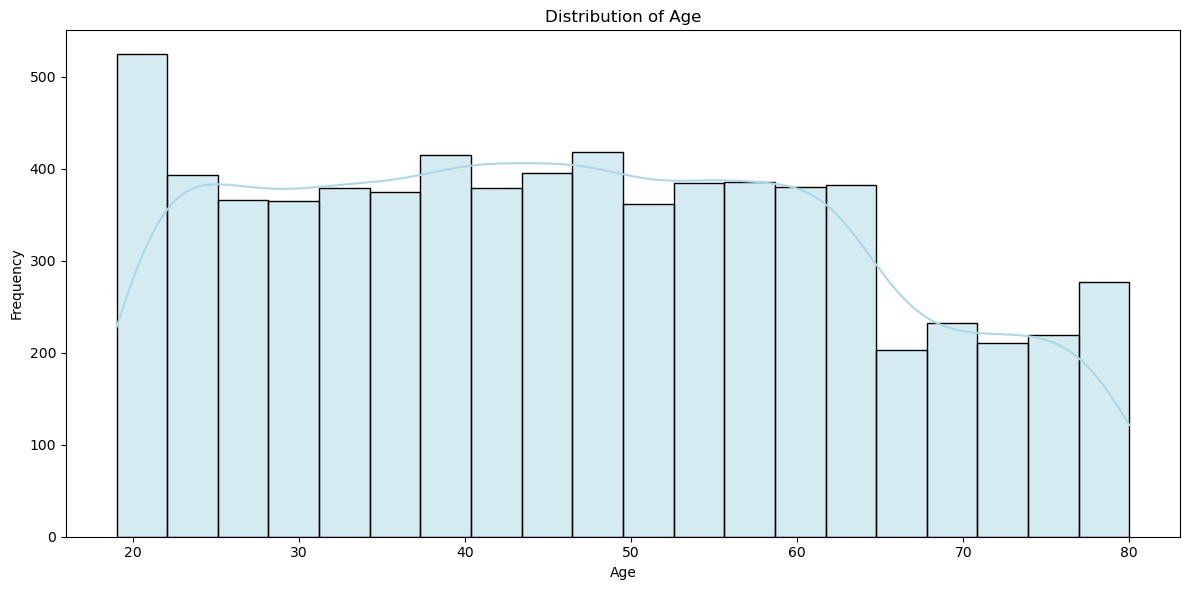

In [36]:
#Lets check the distribution of the Age.
plt.figure(figsize=figsize)
sns.histplot(telco_data['Age'], bins=20, kde=True, color='lightblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

The histogram shows that most customers are between **20 and 60** years old, with fewer in older age groups. Peaks are observed around the mid-20s and 40s.

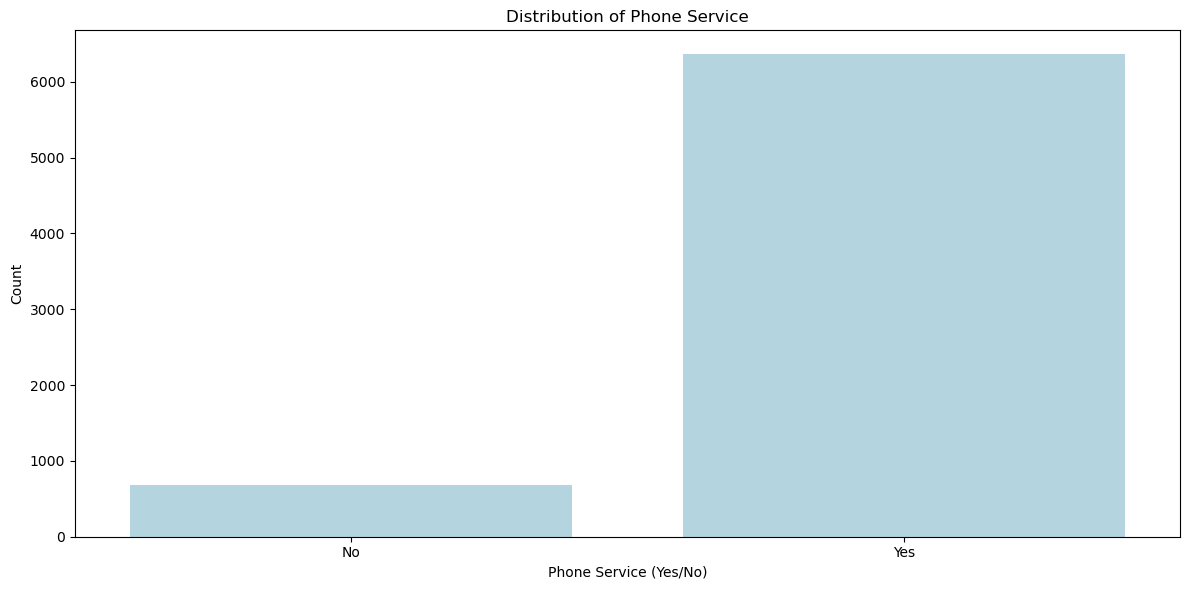

Phone Service
Yes    6361
No      682
Name: count, dtype: int64

In [38]:
#Lets check the distribution of the Phone Service.
plt.figure(figsize=figsize)
sns.countplot(data=telco_data,x="Phone Service", color='lightblue')
plt.title('Distribution of Phone Service')
plt.xlabel('Phone Service (Yes/No)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
telco_data["Phone Service"].value_counts()

The bar plot shows that the vast majority of customers (**6361**) have subscribed to phone service, while a smaller portion (**682**) do not have phone service. This indicates that phone service is highly popular among customers.

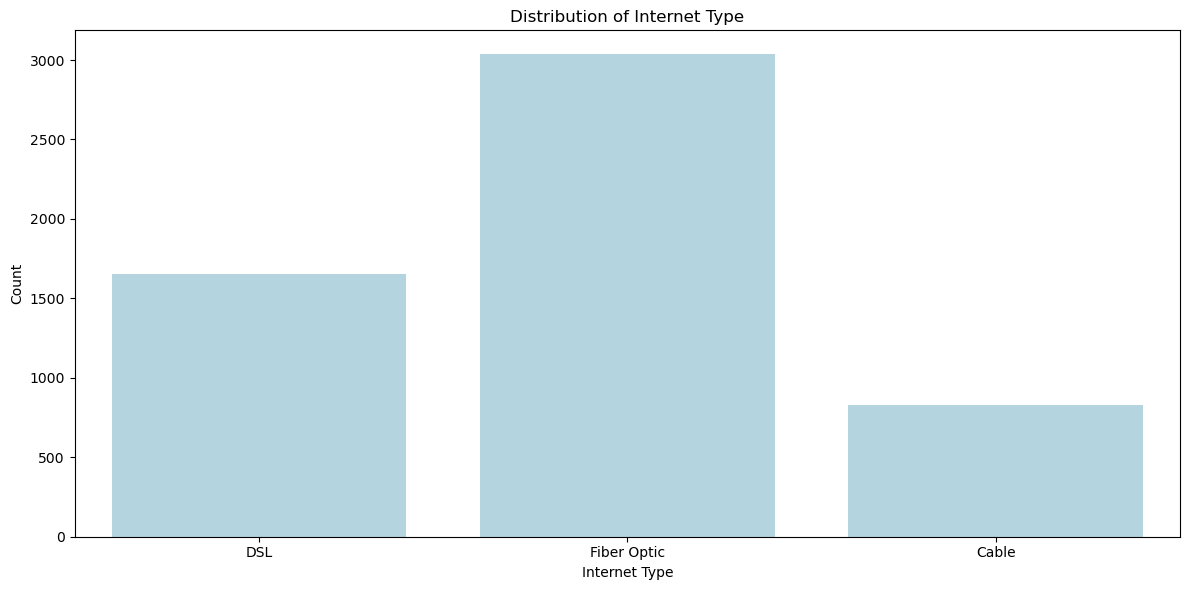

Internet Type
Fiber Optic    3035
DSL            1652
Cable           830
Name: count, dtype: int64

In [40]:
#Lets check the distribution of the Internet Type.
plt.figure(figsize=figsize)
sns.countplot(data=telco_data,x="Internet Type", color='lightblue')
plt.title('Distribution of Internet Type')
plt.xlabel('Internet Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
telco_data["Internet Type"].value_counts()

The graph shows that Fiber Optic is the most widely used Internet service, followed by DSL, while Cable is the least common.


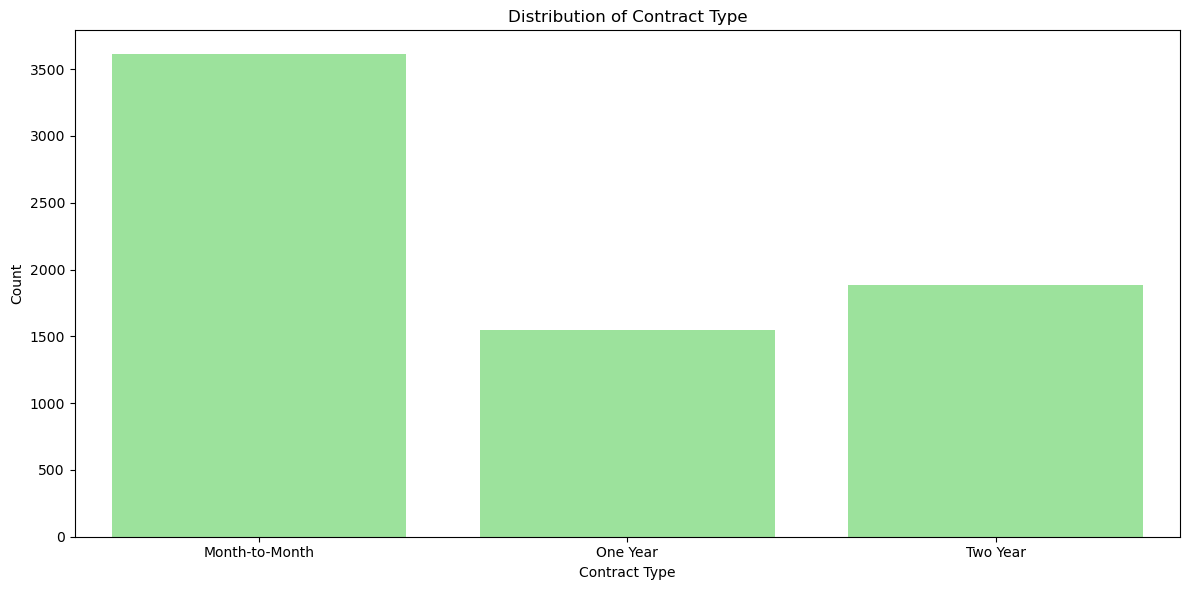

Contract
Month-to-Month    3610
Two Year          1883
One Year          1550
Name: count, dtype: int64

In [42]:
#Lets check the distribution of the Contract.
plt.figure(figsize=figsize)
sns.countplot(data=telco_data,x="Contract", color='lightgreen')
plt.title('Distribution of Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.xticks(rotation=0)  
plt.tight_layout()
plt.show()
telco_data["Contract"].value_counts()

The bar plot shows that the Month-to-Month contract is the most common among customers, followed by the Two Year and One Year contracts. This indicates a preference for flexibility, as more customers opt for shorter-term commitments

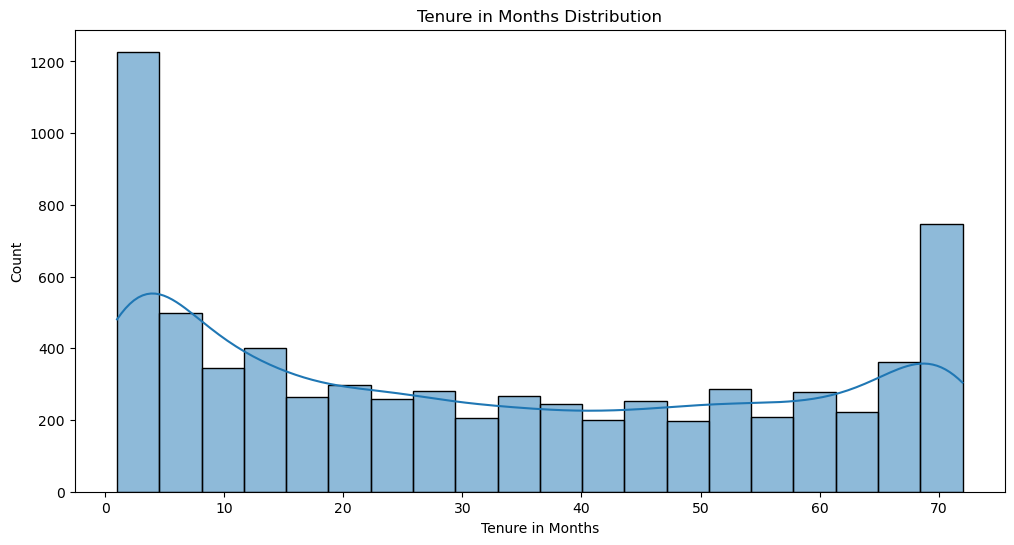

In [44]:
plt.figure(figsize=figsize)
sns.histplot(telco_data['Tenure in Months'], bins=20, kde=True)
plt.title("Tenure in Months Distribution")
plt.show()
low_tenure = telco_data[telco_data['Tenure in Months'] <= 10].shape[0]
per = low_tenure/telco_data.shape[0]

The bar plot highlights that many customers 27.97% have shorter tenures (less than 10 months).

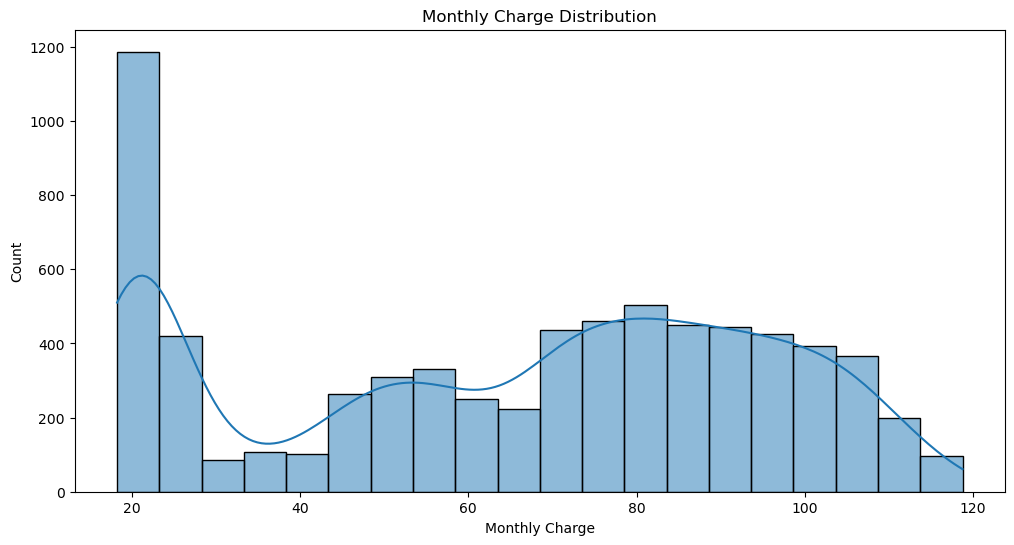

In [46]:
plt.figure(figsize=figsize)
sns.histplot(telco_data['Monthly Charge'], bins=20, kde=True)
plt.title("Monthly Charge Distribution")
plt.show()

The bar plot displays a spread of monthly charges, with a slight skew toward lower charges.

## b. Show plots illustrating bivariate relationships for at least 2 pairs of variables. Explain what you observe (e.g., positive/negative correlation, no correlation, etc.).


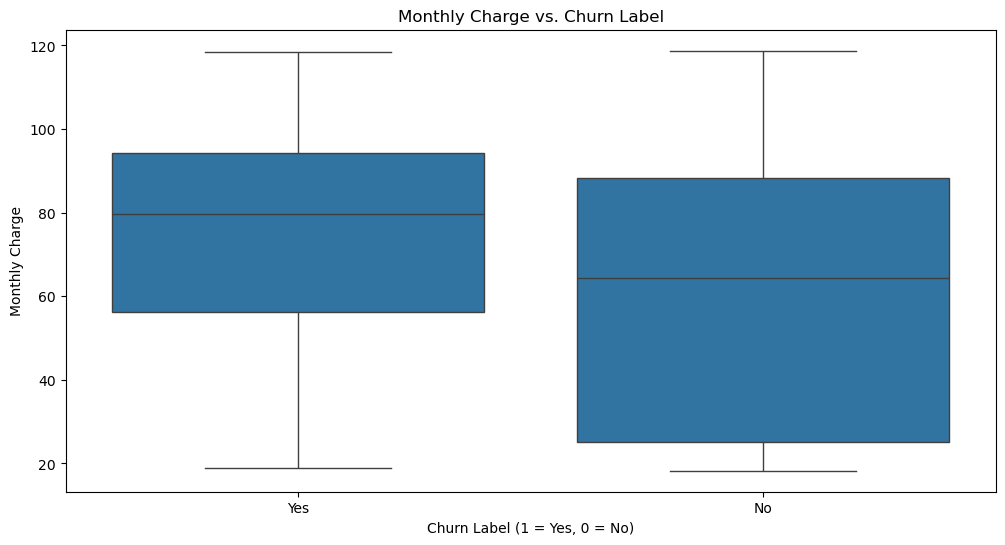

In [49]:
#Monthly Charge vs. Churn
plt.figure(figsize=figsize)
sns.boxplot(x=telco_data['Churn Label'], y=telco_data['Monthly Charge'])
plt.title("Monthly Charge vs. Churn Label")
plt.xlabel('Churn Label (1 = Yes, 0 = No)')
plt.ylabel('Monthly Charge')
plt.show()

Customers who churn tend to have a positive correlation with higher monthly charges. This means that as the monthly charges increase, the likelihood of a customer churning also increases, although the correlation may not be very strong. This positive relationship suggests that higher costs may be a contributing factor to customer churn.

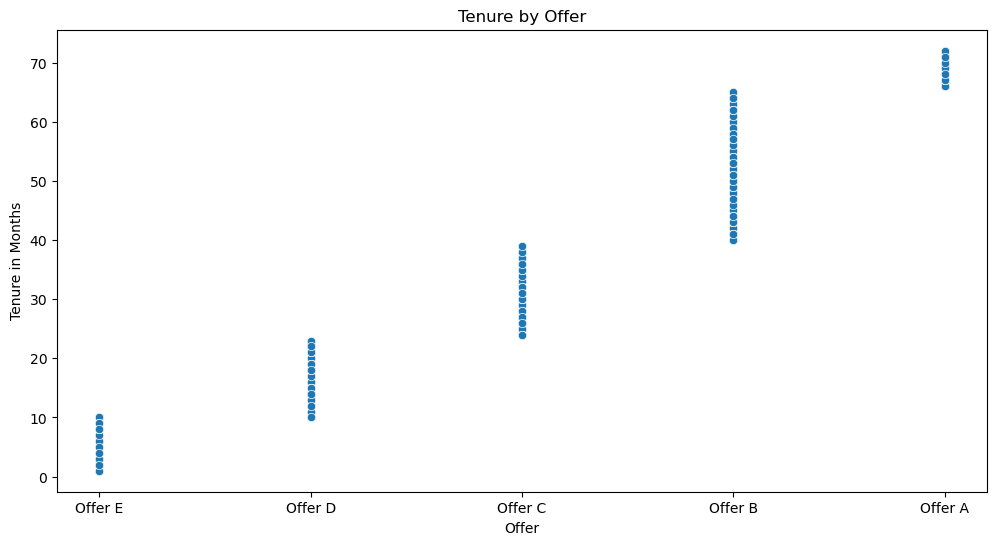

In [51]:
plt.figure(figsize=figsize)
sns.scatterplot(y='Tenure in Months', x='Offer', data=telco_data)
plt.title("Tenure by Offer")
plt.show()

We can see that offer A is the one that keeps the customers the longest. It could indicate that offer A is the most attractive offer or that it is only offered to long term customers. Unfortunately, we do not have enough information to reach a conclusion.<br> Also, it's important to note that only 45% of the customers have an offer.

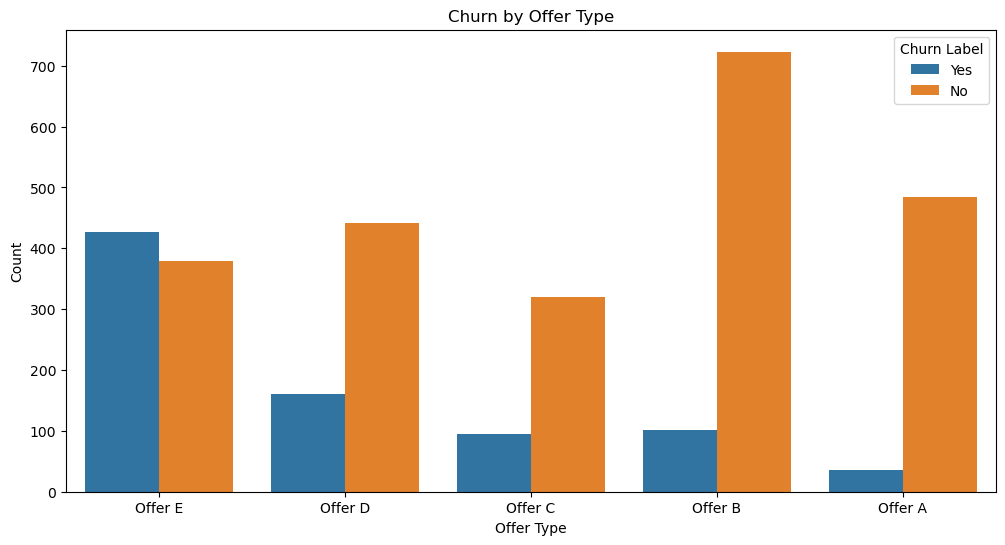

In [53]:
# Plotting the count of churned vs non-churned customers for each offer type
plt.figure(figsize=figsize)
sns.countplot(x='Offer', hue='Churn Label', data=telco_data)
plt.title('Churn by Offer Type')
plt.xlabel('Offer Type')
plt.ylabel('Count')
plt.legend(title='Churn Label', loc='upper right')
plt.show()

In contrary to the Tenure by Offer, Offer B is the most effective in customer retention while Offer E is the least efficient.

# Part three  - Estimation and hypothesis testing<br>
The question we want to explore is: Does the monthly charge impact the likelihood of churn?<br>
This question is interesting because pricing is a crucial factor in customer decisions. Customers who are charged higher amounts might be more likely to churn, especially if they feel they are not receiving value for the money spent. Understanding this relationship can help businesses adjust pricing strategies to improve retention.


H0: The average monthly charge of churned customers is equal to the average monthly charge of non-churned customers. <br>
H1: The average monthly charge of churned customers is higher than the average monthly charge of non-churned customers.<br>
**Test Statistic:** The difference in the average monthly charge between churned and non-churned customers.

In [57]:
def bootstrap_mean_diff(churned,not_churned,col, num_replications=20000):
    # Run bootstrap (vectorized)
    rng = np.random.default_rng()
    sample_churned = rng.choice(churned[col], size=(num_replications, len(churned[col])), replace=True).mean(axis=1)
    sample_not_churned = rng.choice(not_churned[col], size=(num_replications, len(not_churned[col])), replace=True).mean(axis=1)
    diff_means = sample_churned - sample_not_churned
    return diff_means

In [58]:
# Separate data into churned and not churned customers
churned = telco_data[telco_data['Churn Label'] == 'Yes']
not_churned = telco_data[telco_data['Churn Label'] == 'No']

# Calculate Test statistic
test_statistic = churned['Monthly Charge'].mean() - not_churned['Monthly Charge'].mean()

# Run bootstrap method for Monthly Charge and Churn Label
bootstrap_diffs = bootstrap_mean_diff(churned,not_churned, 'Monthly Charge')
# Calculate confidence interval
lower_value = np.percentile(bootstrap_diffs, 2.5)
upper_value = np.percentile(bootstrap_diffs, 97.5)

print("95% confidence interval for the difference in means:")
print(f"Lower bound: {lower_value}")
print(f"Upper bound: {upper_value}")

95% confidence interval for the difference in means:
Lower bound: 11.767321400004295
Upper bound: 14.572402835963363


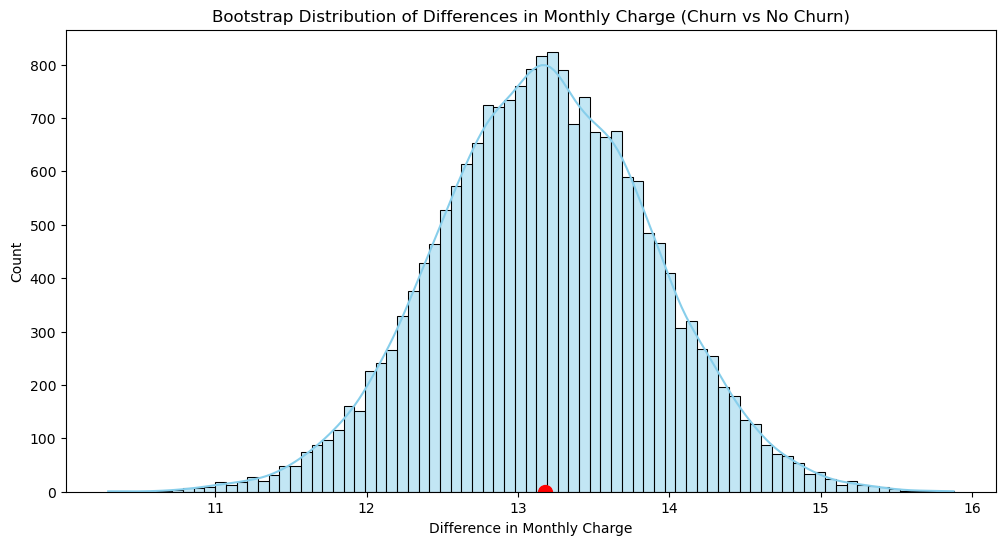

Test statistic= 13.18


In [59]:
# Plot the distribution of bootstrap differences
plt.figure(figsize=figsize)
sns.histplot(bootstrap_diffs, kde=True, color='skyblue')
plt.scatter([test_statistic], [0], color='red', s=100, label='Observed Difference')
plt.title('Bootstrap Distribution of Differences in Monthly Charge (Churn vs No Churn)')
plt.xlabel('Difference in Monthly Charge')
plt.ylabel('Count')
plt.show()
print("Test statistic= {:.2f}".format(test_statistic))

Test Statistic: The observed difference in average monthly charges between churned and non-churned customers is approximately 13.18
<br>
After running 20,000 bootstrap replications, the 95% confidence interval for the difference in means between churned and non-churned customers was calculated to be: lower bound: print(f"Upper bound: {upper_value}")
11.74, upper bound: 14.57<br>
Since the observed difference in means (13.18) falls within the 95% confidence interval, and the confidence interval does not contain zero, we reject the null hypothesis. This suggests that churned customers, on average, have higher monthly charges compared to non-churned customers. Therefore, we conclude that higher monthly charges are associated with an increased likelihood of customer churn.
This interpretation is visualized in the bootstrapped distribution plot, where the observed difference (red point) is located within the bootstrapped distribution, confirming that the alternative hypothesis holds at the 95% confidence level.




# Part 4 - Churn Prediction

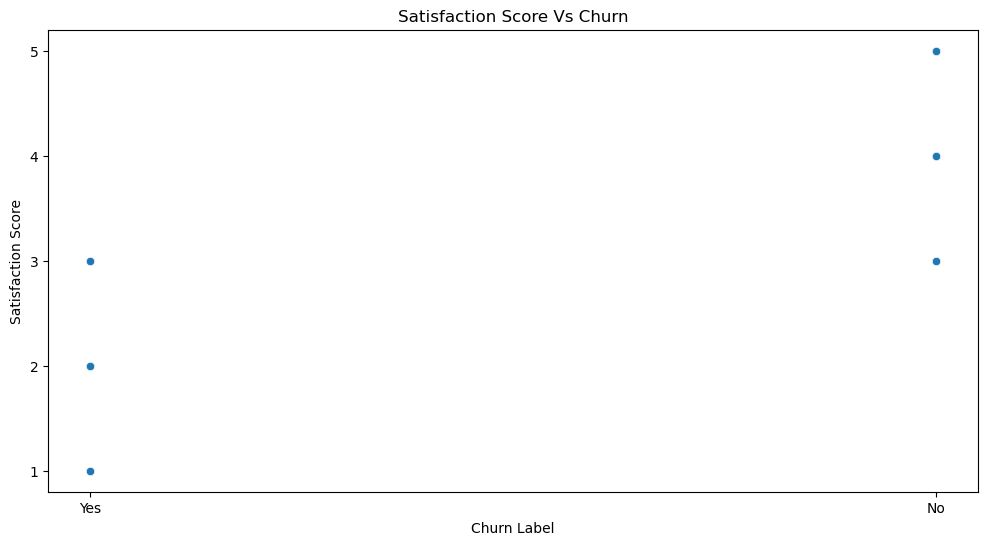

In [62]:
plt.figure(figsize=figsize)
sns.scatterplot(y='Satisfaction Score', x='Churn Label', data=telco_data)
plt.title("Satisfaction Score Vs Churn")
plt.yticks([1,2,3,4,5])
plt.show()

We can see that the customers who churned have a lower satisfaction score (1-2) are going to leave the company, where the customers who stayed have a high satisfaction score (4-5) will stay with the company. When looking at the customers who have a satisfaction score of 3, we can see that they might leave the company, or they might stay. We would like to evaluate the likelihood of a customer with a score of 3 leaving the company.

In [64]:
# define X and Y where X is only the costumers who might churn
X = telco_data[telco_data['Satisfaction Score'] == 3].copy()
Y = X['Churn Label'].copy()

# Drop irrelevant columns
X.drop(columns=['Customer ID', 'Churn Label', 'Churn Reason', 'Churn Category', 'Churn Score', 'CLTV', 'Churn Reason', 'Churn Label', 'Churn Reason', 'Customer Status', 'Country', 'State', 'Quarter', 'Satisfaction Score','City', 'Dependents'], inplace=True)
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Handle categorical variables
X = pd.get_dummies(X, columns=categorical_features)

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.70, random_state=7)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(f"X train set size:\t{X_train.shape}\nX_test set size:\t{X_test.shape}\n" \
      f"Y_train set size:\t{Y_train.shape}\nY_test set size:\t{Y_test.shape}")

X train set size:	(1865, 64)
X_test set size:	(800, 64)
Y_train set size:	(1865,)
Y_test set size:	(800,)


In [65]:
def kNN_by_k(X_train, Y_train, k, cvk=10):
    """
    Gets train sets (X and Y), a k number (for kNN) and cvk (cross-validation k) [defaults=10].
    Generates, trains, predicts and evaluates the model.
    Returns the mean accuracy (cross-validation with K=cvk).
    """
    # define the model
    kNN = KNeighborsClassifier(n_neighbors=k)

    # evaluate the model
    accuracy = cross_val_score(kNN, X_train, Y_train, cv=cvk).mean()

    # return the accuracy
    return accuracy

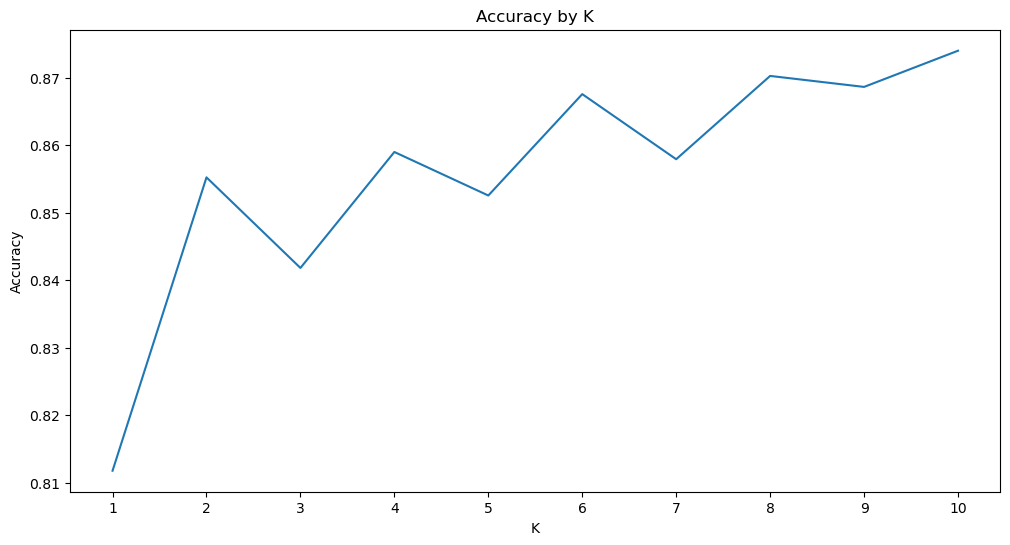

In [66]:
# Evaluate kNN model for different k values
kNN_number = np.arange(1, 11)
evaluate_kNN = np.apply_along_axis(lambda x: kNN_by_k(X_train_scaled, Y_train, x[0]), 1, kNN_number.reshape(-1, 1))
plt.figure(figsize=figsize)
plt.plot(kNN_number, evaluate_kNN)
plt.xticks(np.arange(1, 11));
plt.title("Accuracy by K");
plt.xlabel("K");
plt.ylabel("Accuracy");

In [67]:
# model fitting and accuracy estimation for the test set for the chosen K
chosen_k = 6
kNN = KNeighborsClassifier(n_neighbors=chosen_k)
kNN.fit(X_train_scaled, Y_train)
kNN.score(X_test_scaled, Y_test)
print(f"Chosen K: {chosen_k}\nAccuracy: {kNN.score(X_test_scaled, Y_test)}")

Chosen K: 6
Accuracy: 0.87375


K=6 was chosen as the optimal number of neighbors for the kNN classifier even that 8 is a bit higher, but we chose 6 because it is the lowest number of neighbors that gives the highest accuracy since too many neighbours can lead to overfitting to the train dataset.

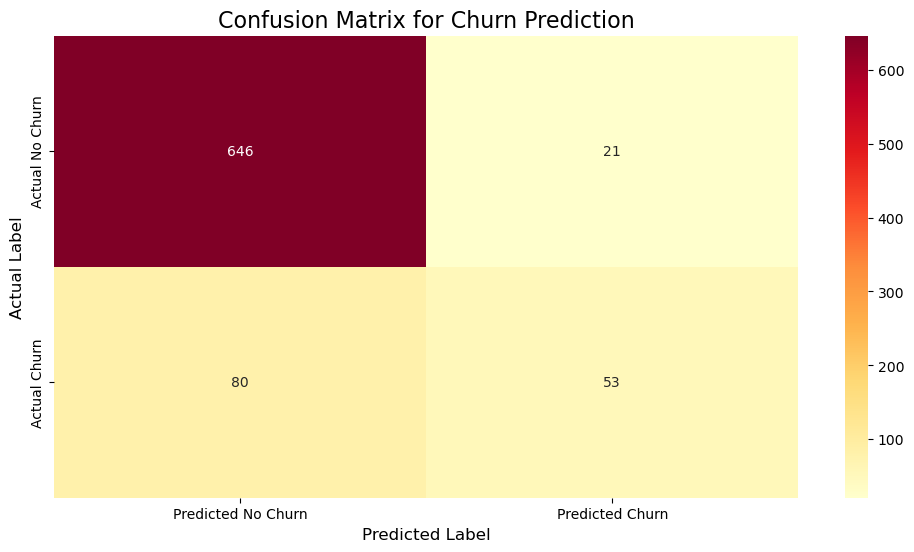

              precision    recall  f1-score   support

          No       0.89      0.97      0.93       667
         Yes       0.72      0.40      0.51       133

    accuracy                           0.87       800
   macro avg       0.80      0.68      0.72       800
weighted avg       0.86      0.87      0.86       800



In [69]:
Y_pred = kNN.predict(X_test_scaled)
comparison_df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
# Create the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# Create a DataFrame for better labeling
cm_df = pd.DataFrame(cm, index=['Actual No Churn', 'Actual Churn'], columns=['Predicted No Churn', 'Predicted Churn'])

# Set up the matplotlib figure
plt.figure(figsize=figsize)

# Create the heatmap
sns.heatmap(cm_df, annot=True, fmt='d', cmap='YlOrRd')

# Set title and labels
plt.title('Confusion Matrix for Churn Prediction', fontsize=16)
plt.ylabel('Actual Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)

# Show the plot
plt.show()

# Calculate the classification report
print(classification_report(Y_test, Y_pred))

Looking at the confusion matrix we can see that our classifier has good performance for predicting the customers that will stay with the company, but it has a lower performance for predicting the customers that will leave the company. <br>
The classification report shows that the model has a high precision for predicting the customers that will stay with the company, but a lower recall for predicting the customers that will leave the company.<br>
Taking all of that into account we can see that the KNN model isn't sufficient to predict customers that will churn.<br>
We might need to consider using a different model.